## Supervised Machine Learning - Simple Linear Regression

*In this regression task, the percentage of marks that a student is expected to score is calculated based on the number of hours they studied. This is a simple linear regression task as it involves just two variables*

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read in the Student Scores csv file

In [2]:
student_scores=pd.read_csv('Student Scores.csv')
student_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
student_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Using plots to manually compare the Hours and Scores column and see if there is any correlation

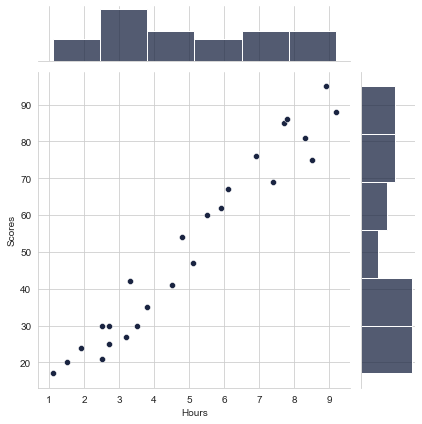

In [4]:
sns.set_style('whitegrid')
sns.set_palette('cubehelix')
sns.jointplot(x='Hours',y='Scores',data=student_scores)

*It is clear that there exists a positive linear relationship between the number of hours studied and the score procured by the students*

Text(3.9250000000000043, 0.5, 'Score')

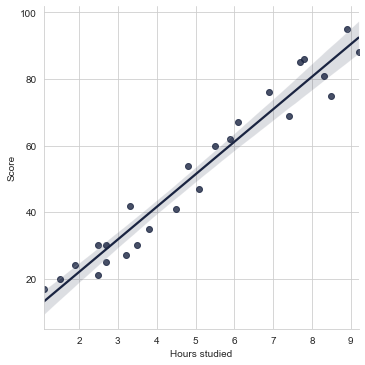

In [5]:
sns.lmplot(x='Hours',y='Scores',data=student_scores)
plt.xlabel('Hours studied')
plt.ylabel('Score')

### Splitting the data into training and testing sets

In [6]:
X=np.array(student_scores['Hours']).reshape(-1,1)
y=student_scores['Scores']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Training the model

In [9]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [10]:
lm.fit(X_train,y_train)

LinearRegression()

In [11]:
print('Coefficients:\n',lm.coef_)

Coefficients:
 [9.78856669]


### Predicting test data

In [12]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

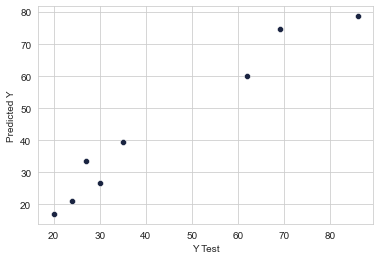

In [13]:
sns.scatterplot(x=y_test,y=predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [14]:
df=pd.DataFrame({'Actual':y_test,'Predicted':predictions})
df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


### Predicted score if a student studied for 9.25 hours

In [15]:
print('Predicted Score: ',lm.predict([[9.25]])[0])

Predicted Score:  92.91505723477056


### Evaluating the model

In [16]:
from sklearn import metrics

In [17]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))

Mean Absolute Error:  4.419727808027652
Mean Squared Error:  22.96509721270043
Root Mean Squared Error:  2.1023148689070466
